**Please insert your full name: Danial Ahangarani

**And your student number: 400211546



---



# Q1 (Sharpening)


## Import dependencies:

In [212]:
import numpy as np
from scipy import signal, misc,ndimage
from skimage import filters, feature,img_as_float
from skimage.filters import laplace
from skimage.io import imread
from skimage.color import rgb2gray
from PIL import Image, ImageFilter
import matplotlib.pylab as pylab
import time

## Read the image and use four different methods to sharpen the image. Briefly discuss your main approach in each of the methods.

You are allowed to use any kind of different methods. The recommanded ones are as follow:

1) unsharp mask filter

2) second deriative or guassian laplacian

3) unsharp mask in frequency domain

4) laplacian in frequency domain , sharpening with laplacian

## First Method


    First, we obtain the detailed image by subtracting the blurred image(with Gaussian filter) from the 
    original image.Then we add the original image with a coefficient of the detailed image to get the sharpened 
    image.

<Figure size 640x480 with 0 Axes>

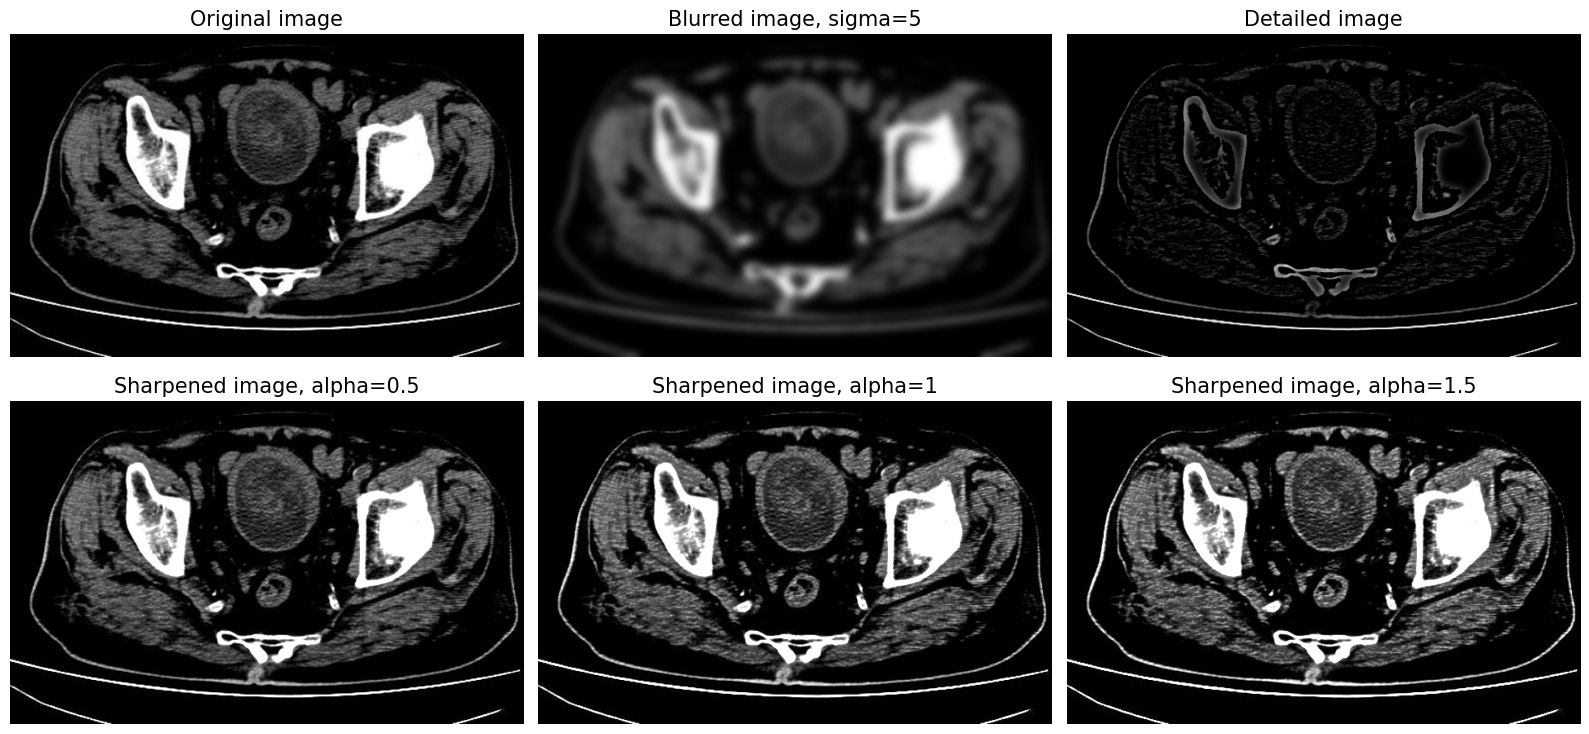

--- 0.8588171005249023 seconds ---


In [149]:
def rgb2gray(im):
    # Here i'm trying to convert rgb to grayscale with cliping.
    return np.clip(0.3 * im[...,0] + 0.6 * im[...,1]+ 0.1 * im[...,2], 0, 1)

start_time = time.time()
# Read image.
im = cv2.imread('image1.jpeg')
# Converting RGB image to Grayscale.
im =rgb2gray(img_as_float(imread('image1.jpeg')))
# Gaussian filter
# A Gaussian Filter is a low pass filter used for reducing noise (high frequency components) and blurring regions of an image.
im_blurred = ndimage.gaussian_filter(im, 5)
# Get the detailed image and limit value between 0, 1. 
im_detail = np.clip(im - im_blurred, 0, 1)
# Plot
pylab.gray()
fig, axes = pylab.subplots(nrows=2, ncols=3,sharex=True, sharey=True, figsize=(16, 16))
axes = axes.ravel()
axes[0].set_title('Original image', size=15),
axes[0].imshow(im)
axes[1].set_title('Blurred image, sigma=5', size=15),
axes[1].imshow(im_blurred)
axes[2].set_title('Detailed image', size=15),
axes[2].imshow(im_detail)

# Determine coefficient
alpha = [.5, 1, 1.5]
# Plot sharpened images based on different alpha.
for i in range(3):
    im_sharp = np.clip(im + alpha[i]*im_detail, 0, 1)
    axes[3+i].imshow(im_sharp),
    axes[3+i].set_title('Sharpened image, alpha=' + str(alpha[i]), size=15)
for ax in axes:
    ax.axis('off')
    fig.tight_layout()
pylab.show()

first_method = time.time() - start_time
print("--- %s seconds ---" % (first_method))

## Second Method

    1-Apply the gaussian and then Laplacian filter to the original input image.--> blur and then edges.
    2-subtracting the blurred image(with Gaussian and laplace filter) from the original image



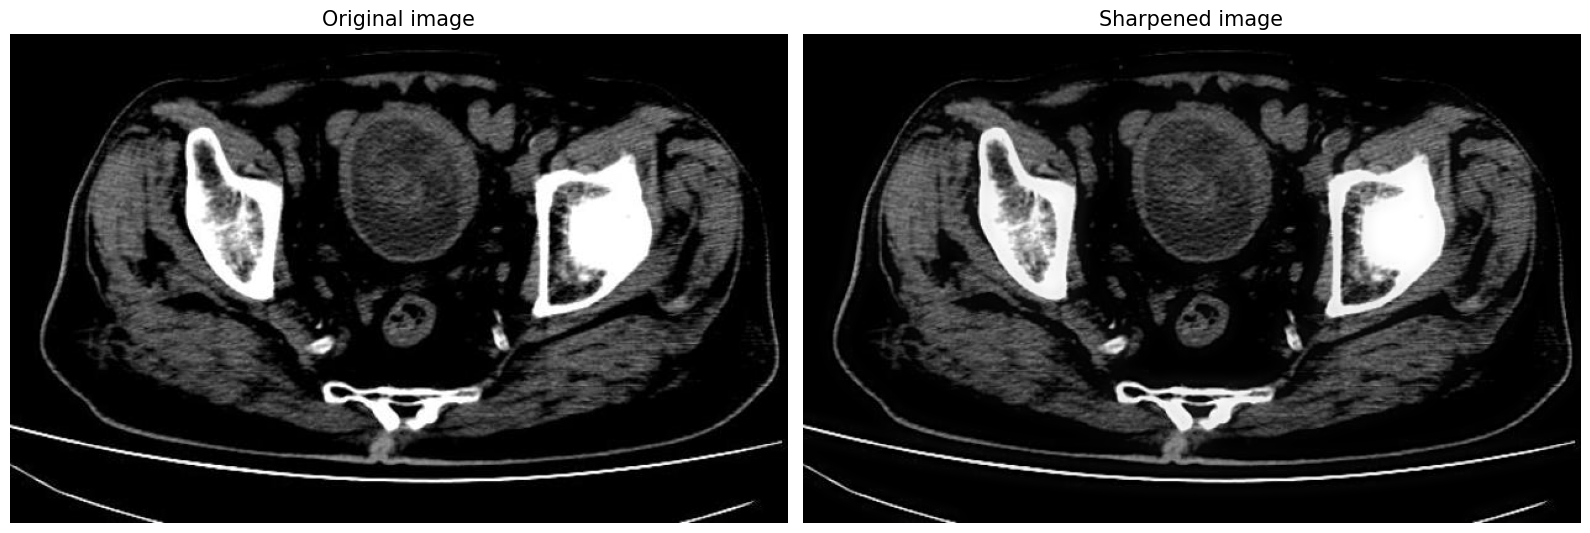

--- 0.3757591247558594 seconds ---


In [159]:
def rgb2gray(im):
    # Here i'm trying to convert rgb to grayscale with cliping.
    return np.clip(0.3 * im[...,0] + 0.6 * im[...,1]+ 0.1 * im[...,2], 0, 1)

start_time = time.time()
# Read image.
im = cv2.imread('image1.jpeg')
# Converting RGB image to Grayscale.
im =rgb2gray(img_as_float(imread('image1.jpeg')))
# Gaussian filter
# A Gaussian Filter is a low pass filter used for reducing noise (high frequency components) and blurring regions of an image.
im_blurred = ndimage.gaussian_filter(im, 5)
# detects sudden intensity transitions in a blurred image and highlights the edges. . 
im_guassian_laplace = laplace(im_blurred)

# Plot original iamge.
fig, axes = pylab.subplots(nrows=1, ncols=2,sharex=True, sharey=True, figsize=(16, 16))
axes = axes.ravel()
axes[0].set_title('Original image', size=15),
axes[0].imshow(im)

# Sharpen details in the image.
k = 5
im_sharp = np.clip(im - k * im_guassian_laplace, 0, 1)
# Plot sharpened image.
axes[1].set_title('Sharpened image', size=15),
axes[1].imshow(im_sharp)
for ax in axes:
    ax.axis('off')
    fig.tight_layout()
pylab.show()

second_method = time.time() - start_time
print("--- %s seconds ---" % (second_method))

## Third Method

    First we get high pass filter of an image and add it to the original image.
    Or we could get low pass filter and subtract it from original image. then give it
    a coefficient and add it to the original image.

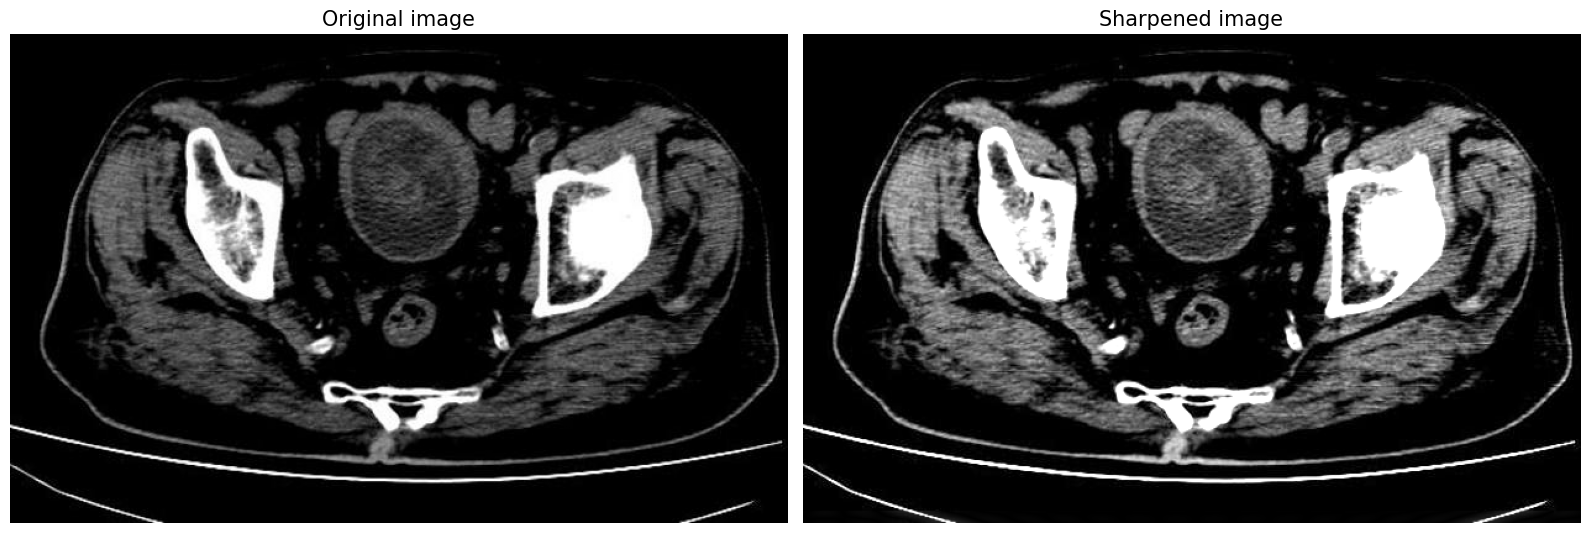

--- 0.42887115478515625 seconds ---


In [209]:
start_time = time.time()

#Square filter
#High pass filter
def h_p_f(im, x, y):
    r, c = int(im.shape[0]/2), int(im.shape[1]/2)
    
    f = np.fft.fft2(im)
    fshift = np.fft.fftshift(f)
    
    fshift[(r-x):(r+x+1), (c-y):(c+y+1)] = (1e-10) * fshift[(r-x):(r+x+1), (c-y):(c+y+1)]
    
    f_ishift = np.fft.ifftshift(fshift)
    im_back = np.fft.ifft2(f_ishift)
    im_back = np.abs(im_back)
    return im_back

#Low pass filter
def l_p_f(im, x, y):
    return im - h_p_f(im, x, y)

im = img_as_float(imread('image1.jpeg'))
im_lpf = l_p_f(im, 10, 10)

#Plot
fig, axes = pylab.subplots(nrows=1, ncols=2,sharex=True, sharey=True, figsize=(16, 16))
axes = axes.ravel()
axes[0].set_title('Original image', size=15),
axes[0].imshow(im)

k = .5
im_sharp = np.clip(im + k *(im - im_lpf), 0, 1) #Or im + k*im_hpf
# Plot sharpened image.
axes[1].set_title('Sharpened image', size=15),
axes[1].imshow(im_sharp)

for ax in axes:
    ax.axis('off')
    fig.tight_layout()
pylab.show()
third_method = time.time() - start_time
print("--- %s seconds ---" % (third_method))

## Forth Method

    1-Apply the Laplacian filter to the original input image.
    2-Add the output image obtained from step 1 and the original input image (to obtain the sharpened image).

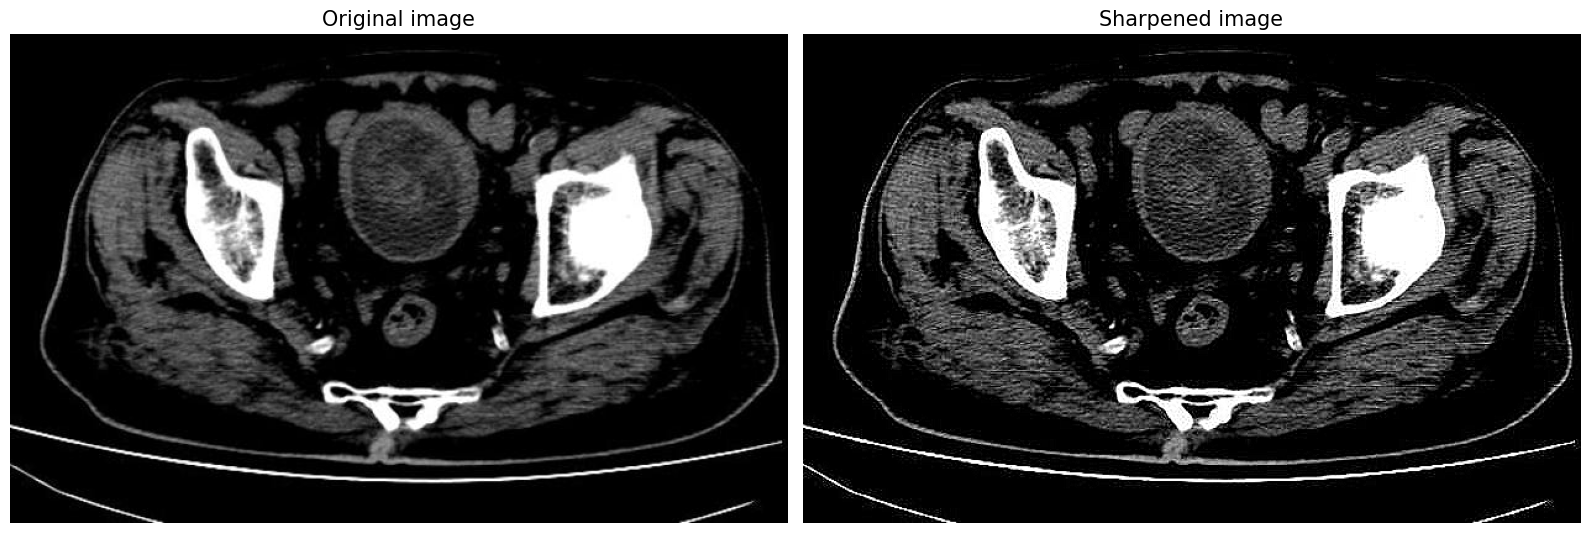

--- 0.37066102027893066 seconds ---


In [270]:
#Forth method --> sharping using laplacian
start_time = time.time()

im = rgb2gray(imread('image1.jpeg'))
im1 = np.clip(laplace(im) + im, 0, 1)
fig, axes = pylab.subplots(nrows=1, ncols=2,sharex=True, sharey=True, figsize=(16, 16))
axes = axes.ravel()
axes[0].set_title('Original image', size=15),
axes[0].imshow(im)
#pylab.axis('off')
axes[1].set_title('Sharpened image', size=15),
axes[1].imshow(im1)

for ax in axes:
    ax.axis('off')
    fig.tight_layout()
pylab.show()

Forth_method = time.time() - start_time
print("--- %s seconds ---" % (Forth_method))

### Compare different methods quality and time.

    First(unsharp mask) and last(laplacian) methods generate better results.
    Between these two, unsharp masking generate beter result but it takes a bit longer than laplacian.
    Overal i prefer two use unsharp masking due to it's better result.

# Q2(Filtering)

## Import dependencies:

In [348]:
import numpy as np
from scipy import signal, misc,ndimage
from skimage import filters, feature,img_as_float
from skimage.filters import laplace
from skimage.io import imread
from skimage.color import rgb2gray
from PIL import Image, ImageFilter
import scipy.fftpack as fp
import matplotlib.pylab as pylab
import time

## Section 1

#### Sobel

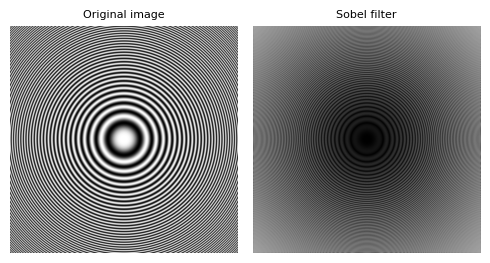

True

In [322]:
im = imread('image2.png')
im1 = filters.sobel(im)

fig, axes = pylab.subplots(nrows=1, ncols=2,sharex=True, sharey=True, figsize=(5, 5))
axes = axes.ravel()
axes[0].set_title('Original image', size=8)
axes[0].imshow(im)

axes[1].set_title('Sobel filter', size=8)
axes[1].imshow(im1)

for ax in axes:
    ax.axis('off')
    fig.tight_layout()
pylab.show()

im1 = cv2.normalize(im1, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
cv2.imwrite('q2_res01.png', im1)

#### gaussian

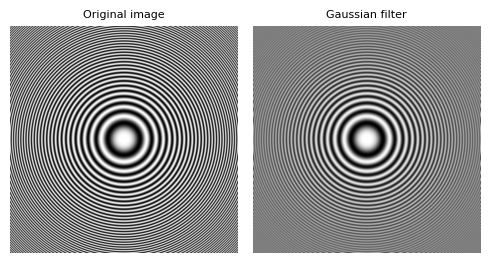

In [323]:
im = Image.open('image2.png')
fig, axes = pylab.subplots(nrows=1, ncols=2,sharex=True, sharey=True, figsize=(5, 5))
axes = axes.ravel()
axes[0].set_title('Original image', size=8),
axes[0].imshow(im)

axes[1].set_title('Gaussian filter', size=8),
im1 = im.filter(ImageFilter.GaussianBlur(5))
axes[1].imshow(im1)

for ax in axes:
    ax.axis('off')
    fig.tight_layout()
pylab.show()
im1.save("q2_res02.png")

#### laplacian

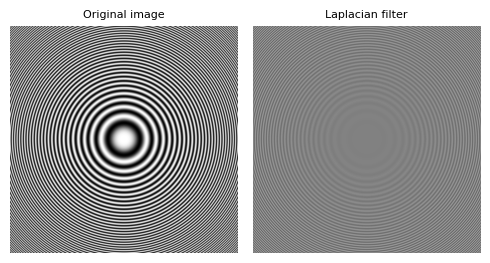

True

In [325]:
im = cv2.imread('image2.png')
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
im1 = laplace(im)

fig, axes = pylab.subplots(nrows=1, ncols=2,sharex=True, sharey=True, figsize=(5, 5))
axes = axes.ravel()
axes[0].set_title('Original image', size=8),
axes[0].imshow(im)

axes[1].set_title('Laplacian filter', size=8),
axes[1].imshow(im1)

for ax in axes:
    ax.axis('off')
    fig.tight_layout()
pylab.show()

im1 = cv2.normalize(im1, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
cv2.imwrite('q2_res03.png', im1)

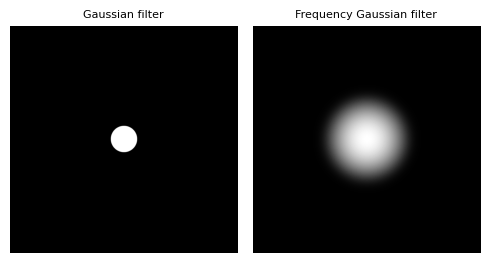

In [626]:
#تبدیل فوریه گوسی همچنان گوسی است
np.seterr(divide = 'ignore')
im = cv2.imread('image2.png')
gauss_kernel = np.outer(signal.gaussian(im.shape[0],3), signal.gaussian(im.shape[1], 3))
freq_kernel = fp.fftshift(fp.fft2(gauss_kernel))


fig, axes = pylab.subplots(nrows=1, ncols=2,sharex=True, sharey=True, figsize=(5, 5))
axes = axes.ravel()
axes[0].set_title('Gaussian filter', size=8),
axes[0].imshow((20*np.log10(gauss_kernel)).real.astype(int))

axes[1].set_title('Frequency Gaussian filter', size=8)
axes[1].imshow(np.log(0.1 + abs(freq_kernel)))

for ax in axes:
    ax.axis('off')
    fig.tight_layout()
pylab.show()

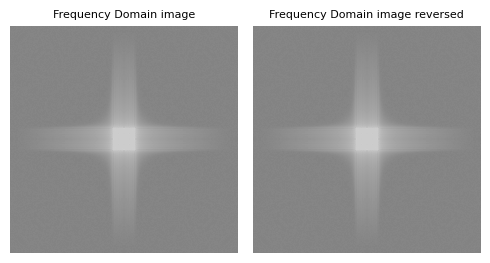

True

In [598]:
#تصویر در حوزه فرکانس و همچنین ریورسش در حوزه فرکانس
np.seterr(divide = 'ignore')
im = cv2.imread('image2.png')
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
freq_im = fp.fftshift(fp.fft2(im))
freq_im = np.log(abs(freq_im))

# plotting
fig, axes = pylab.subplots(nrows=1, ncols=2,sharex=True, sharey=True, figsize=(5, 5))
axes = axes.ravel()
axes[0].set_title('Frequency Domain image', size=8),
axes[0].imshow(freq_im)

axes[1].set_title('Frequency Domain image reversed', size=8)
im_r = cv2.flip(freq_im,1)
axes[1].imshow(freq_im)

for ax in axes:
    ax.axis('off')
    fig.tight_layout()
pylab.show()

im_r = cv2.normalize(im_r, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
cv2.imwrite('q2_res04.png', im_r)

    Gaussian Filter

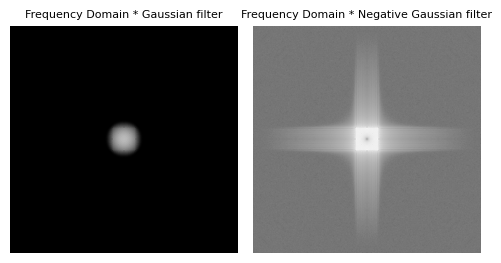

True

In [632]:
np.seterr(divide = 'ignore')

np.seterr(divide = 'ignore')
im = cv2.imread('image2.png')
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
freq_im = fp.fftshift(fp.fft2(im))
freq_im_abs = np.log(abs(freq_im))

gauss_kernel = np.outer(signal.gaussian(im.shape[0],30), signal.gaussian(im.shape[1], 30))
freq_kernel = fp.fftshift(fp.fft2(gauss_kernel))
freq_kernel_abs = np.log(abs(freq_kernel))

fig, axes = pylab.subplots(nrows=1, ncols=2,sharex=True, sharey=True, figsize=(5, 5))
# axes = axes.ravel()
axes[0].set_title('Frequency Domain * Gaussian filter', size=8)
freq_im_gauss_filter = np.log( .1+ abs(freq_im*gauss_kernel))
axes[0].imshow(freq_im_gauss_filter)


axes[1].set_title('Frequency Domain * Negative Gaussian filter', size=8)
Negative = 1-gauss_kernel
N_im_gauss_filter = np.log( .1+ abs(freq_im*Negative))
axes[1].imshow(N_im_gauss_filter)

for ax in axes:
    ax.axis('off')
    fig.tight_layout()
pylab.show()

freq_im_gauss_filter = cv2.normalize(freq_im_gauss_filter, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
N_im_gauss_filter = cv2.normalize(N_im_gauss_filter, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
cv2.imwrite('q2_res05.png', freq_im_gauss_filter)
cv2.imwrite('q2_res06.png', N_im_gauss_filter)

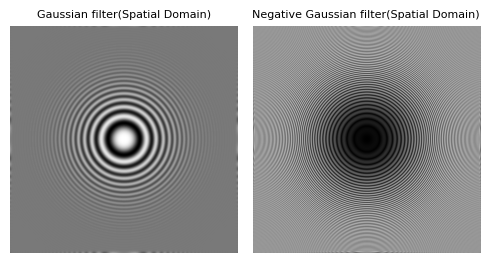

True

In [647]:
P_ifft = fp.ifft2(fp.ifftshift(freq_im * gauss_kernel))
N_ifft = fp.ifft2(fp.ifftshift(freq_im * Negative))

fig, axes = pylab.subplots(nrows=1, ncols=2,sharex=True, sharey=True, figsize=(5, 5))
# axes = axes.ravel()
axes[0].set_title('Gaussian filter(Spatial Domain)', size=8)
axes[0].imshow(abs(P_ifft))
axes[1].set_title('Negative Gaussian filter(Spatial Domain)', size=8)
axes[1].imshow(abs(N_ifft))

for ax in axes:
    ax.axis('off')
    fig.tight_layout()
pylab.show()

cv2.imwrite('q2_res07.png', abs(P_ifft))
cv2.imwrite('q2_res08.png', abs(N_ifft))

    Box Filter

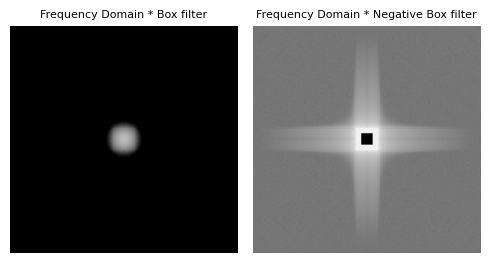

True

In [679]:
np.seterr(divide = 'ignore')

np.seterr(divide = 'ignore')
im = cv2.imread('image2.png')
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
freq_im = fp.fftshift(fp.fft2(im))
freq_im_abs = np.log(abs(freq_im))

box_kernel = np.zeros(im.shape)
box_kernel[950:1050,950:1050] = 1
freq_kernel = fp.fftshift(fp.fft2(box_kernel))
freq_kernel_abs = np.log(abs(freq_kernel))

fig, axes = pylab.subplots(nrows=1, ncols=2,sharex=True, sharey=True, figsize=(5, 5))
# axes = axes.ravel()
axes[0].set_title('Frequency Domain * Box filter', size=8)
freq_im_box_filter = np.log( .1+ abs(freq_im*box_kernel))
axes[0].imshow(freq_im_gauss_filter)


axes[1].set_title('Frequency Domain * Negative Box filter', size=8)
Negative = 1-box_kernel
N_im_box_filter = np.log( .1+ abs(freq_im*Negative))
axes[1].imshow(N_im_box_filter)

for ax in axes:
    ax.axis('off')
    fig.tight_layout()
pylab.show()

freq_im_box_filter = cv2.normalize(freq_im_box_filter, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
N_im_box_filter = cv2.normalize(N_im_box_filter, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
cv2.imwrite('q2_res09.png', freq_im_box_filter)
cv2.imwrite('q2_res10.png', N_im_box_filter)

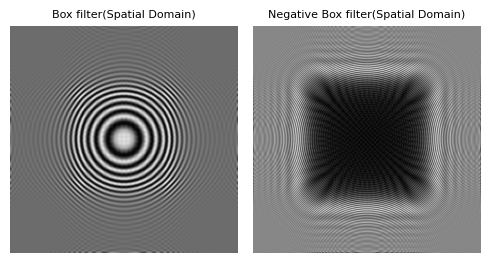

True

In [677]:
P_ifft = fp.ifft2(fp.ifftshift(freq_im * box_kernel))
N_ifft = fp.ifft2(fp.ifftshift(freq_im * Negative))

fig, axes = pylab.subplots(nrows=1, ncols=2,sharex=True, sharey=True, figsize=(5, 5))
axes[0].set_title('Box filter(Spatial Domain)', size=8)
axes[0].imshow(abs(P_ifft))
axes[1].set_title('Negative Box filter(Spatial Domain)', size=8)
axes[1].imshow(abs(N_ifft))

for ax in axes:
    ax.axis('off')
    fig.tight_layout()
pylab.show()

cv2.imwrite('q2_res11.png', abs(P_ifft))
cv2.imwrite('q2_res12.png', abs(N_ifft))

## Section 2

## Compare and contrast results

Box filter is optimal for reducing random noise in spatial domain. However Box filter is the worst filter for frequency domain, with little ability to separate one band of frequencies from another. Gaussian filter has better performance in frequency domain.
Box filter is the least effective among low-pass filters. Ideally it should stop high frequencies and pass only low frequencies. In reality it passes many high frequencies and stops some of the low frequencies.

I think the reason for the emergence of small squares that appeared in the images(Box filter) is The nature of the original image(this image has many frequencies) and poor ability of the box filter in frequency domain.